# Introductory Matters:

Here in this notebook we're going to do a little bit of work with the JSTOR Constellate [data builder](https://constellate.org/builder). I started by searching "free speech" and "First Amendment" as keywords, grabbing all the "full text" document types within the "Law" category. Constellate also has a nice feature that gives assigns a "Dataset ID" to each of the datasets one builds. The one for this project is "b7adbb84-6bec-549e-83bb-11aeb045e5f9". 

## Getting our Libraries Imported

In [77]:
import gzip
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import circlify

## Loading the Data:

I simply downloaded the built dataset to my local machine (other options for loading the dataset are available [here](https://constellate.org/tutorials/exploring-metadata)—the downloaded  file comes as a `.gz` file, so we need to open that up with the handy [`gzip` library](https://docs.python.org/3/library/gzip.html). We want to do a little bit of work with [`pandas`](https://pandas.pydata.org/docs/) here (we could work, of course, just with the standard `json` library, but we're going to want to do some manipulation on the data and pandas is perfecty suited for that). So let's get the file opened and into a DataFrame:

In [78]:
df = pd.read_json(gzip.open('law_full.jsonl.gz'), lines=True)

Initial inspection of the dataframe:

In [79]:
df.head()

creator  \
0                                                       [Thomas Reed Powell]   
1                                           [Elizabeth Goitein, Faiza Patel]   
2                                                                 [H. R. M.]   
3  [Alex Molnar, Faith Boninger, Gary Wilkinson, Joseph Fogarty, Sean Geary]   
4                                                     [Thomas Raeburn White]   

  datePublished        docSubType  docType  \
0    1922-01-01  research-article  article   
1    2020-10-22               NaN   report   
2    1922-09-01  research-article  article   
3    2010-12-02               NaN   report   
4    1904-01-01  research-article  article   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

So we have a dataframe with 33 different columns, we can get a full list of column names:

In [80]:
df.columns

Index(['creator', 'datePublished', 'docSubType', 'docType', 'fullText', 'id',
       'identifier', 'isPartOf', 'issueNumber', 'language', 'outputFormat',
       'pageCount', 'pageEnd', 'pageStart', 'pagination', 'provider',
       'publicationYear', 'publisher', 'sourceCategory', 'tdmCategory',
       'title', 'url', 'volumeNumber', 'wordCount', 'unigramCount',
       'bigramCount', 'trigramCount', 'abstract', 'collection', 'editor',
       'hasPartTitle', 'keyphrase', 'subTitle'],
      dtype='object')

The built dataset has all of the unigrams and their counts in the `unigramCount` as a dictionary—it might be nice to sort them in descending order with the word with the highest count on down. Let's write a simple function to sort the dictionary of unigrams (using the [sorted function](https://www.w3schools.com/python/ref_func_sorted.asp#:~:text=The%20sorted()%20function%20returns,string%20values%20AND%20numeric%20values)):

In [81]:
def sort_a_dictionary_by_values(dictionary):
    sorted_dict = sorted(dictionary.items(), key=lambda x: x[1], reverse=True)
    return(sorted_dict)

We could then create a new column (if we wanted) to hold the sorted dictionary using the pandas [`apply` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html):

In [82]:
df['sorted_unigram_dict'] = df['unigramCount'].apply(sort_a_dictionary_by_values)

Of course, we could also create a list with all the columns we wanted to apply this function to and then write a simply for loop to apply it to all the columns in our list:

In [83]:
columns = ['unigramCount', 'bigramCount', 'trigramCount']
for column in columns:
    df[f"sorted_{column}_dict"] = df[column].apply(sort_a_dictionary_by_values)

# Then we just check to see that the function is doing what we hope it is:
df[['sorted_unigramCount_dict', 'sorted_bigramCount_dict', 'sorted_trigramCount_dict']].head()

sorted_unigramCount_dict  \
0                                                                                                                                                                                                      [(the, 849), (of, 499), (to, 337), (and, 251), (in, 243), (a, 189), (that, 180), (is, 139), (L., 121), (be, 109), (was, 108), (it, 96), (not, 93), (by, 87), (on, 87), (for, 84), (The, 79), (or, 75), (as, 68), (state, 67), (which, 51), (an, 51), (REV., 49), (may, 47), (with, 42), (Justice, 40), (are, 40), (*, 39), (its, 37), (U., 37), (REv., 35), (statute, 35), (were, 35), (Mr., 35), (power, 34), (v., 34), (S., 33), (Ct., 31), (MICH., 31), (Sup., 31), (had, 31), (court, 30), (their, 30), (public, 30), (have, 30), (this, 29), (from, 28), (but, 28), (no, 26), (been, 25), (without, 25), (upon, 24), (against, 24), (they, 23), (at, 22), (held, 21), ("The, 21), (question, 21), (other, 20), (company, 20), (whether, 20), (so, 20), (would, 19), (because, 19), (LAW, 19), (I9, 19), (cases, 19), (under, 19), (has, 19), (right, 19), (than, 18), (what, 17), (such, 17), (gas, 17), (compensation, 17), (In, 17), (United, 16), (law, 16), (rates, 16), (THE, 16), (if, 16), (4I, 16), (use, 15), (sustained, 15), (only, 15), (private, 15), (MICHIGAN, 15), (police, 15), (more, 15), (there, 15), (J., 14), (FEDERAL, 14), (It, 14), (made, 14), (Co., 14), (IN, 14), (his, 14), (This, 14), (CONSTITUTION, 14), (REVIEW, 14), ...]   
1                                                                                                                                 [(., 768), (and, 490), (the, 468), (of, 376), (to, 299), (for, 191), (a, 151), (in, 147), (on, 132), (that, 93), (The, 83), (National, 68), (should, 66), (as, 63), (is, 61), (Brennan, 61), (Center, 59), (with, 51), (2020,, 49), (by, 49), (A, 47), (Justice, 45), (or, 42), (has, 41), (president, 41), (Security, 41), (are, 38), (Act, 37), (an, 37), (U, 36), (.S, 36), (from, 35), (be, 33), (2019,, 33), (Congress, 32), (which, 31), (national, 31), (have, 30), (New, 30), (not, 29), (law, 29), (Liberty, 28), (their, 28), (Presidential, 27), (—, 26), (Cong, 26), (at, 26), (government, 26), (it, 24), (E, 22), (our, 22), (No, 22), (Agenda, 22), (Muslim, 21), (Justice,, 21), (Department, 21), (these, 21), (also, 21), (this, 20), (United, 20), (its, 20), (FBI, 20), (other, 20), (N, 19), (federal, 18), (116th, 18), (such, 18), (emergency, 18), (It, 18), (support, 18), (ƒ, 17), (Trump, 17), (Law, 17), (information, 16), (York, 16), ((2020), 16), (June, 16), (domestic, 16), (security, 16), (agencies, 16), (executive, 16), (Intelligence, 16), (https://www., 16), (than, 16), (intelligence, 14), (U.S., 14), (August, 14), (they, 14), (white, 14), (April, 14), (https://, 14), (Before, 14), (been, 14), (October, 14), (H, 14), (May, 13), (v, 13), (any, 13), (about, 13), (data, 13), ...]   
2                                                                                                                                                                                                                                                                       [(the, 262), (of, 206), (to, 79), (and, 78), (in, 74), (is, 65), (a, 56), (that, 52), (v., 38), (by, 33), (The, 32), (or, 30), (it, 29), (was, 28), (Cal., 28), (People, 25), (as, 25), (be, 23), (Pac., 21), (for, 20), (its, 19), (law, 18), (not, 16), (an, 15), (., 14), (which, 14), (n., 13), (are, 13), (who, 13), (Dec., 12), (this, 12), (any, 12), (p., 11), (against, 11), (such, 11), (on, 11), (criminal, 11), (at, 10), (when, 10), (have, 10), (crime, 10), (they, 10), (may, 10), (Law, 9), (App., 9), (It, 9), (but, 9), (supra,, 9), (their, 8), (State, 8), (one, 8), (Act, 8), (W., 8), (been, 8), (his, 8), (with, 7), (than, 7), (has, 7), (case, 7), (only, 7), (social, 7), (upon, 7), (will, 7), (our, 7), (danger, 6), (so, 6), (all, 6), (those, 6), (ing, 6), (methods, 6), (Freedom, 6), (A, 6), (there, 6), (party, 6), (free, 6), (On, 6), (present, 6), (since, 6), (R

(We might come back and utilize this a little bit more.)

Since we're interested in potentially visualizing word counts in a way that provides a slight tweak on the good ol' Word Cloud, the `fullText` column looks like a real clear column of interest. We can also see that JSTOR has already written the code to generate unigrams, bigrams, and trigrams for us. Those three columns are also potentially quite useful. In fact, the WordCloud library already has [a function](https://amueller.github.io/word_cloud/auto_examples/frequency.html?highlight=generate%20from%20frequencies) to create the cloud right from the word frequencies. So let's write a function that utilizes it and creates the word cloud:

In [84]:
def generate_word_cloud(dict_values):

    wordcloud = WordCloud(width=1000, height=600, max_words=100, random_state=1, background_color='gray', colormap='plasma', collocations=False).generate_from_frequencies(dict_values)
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

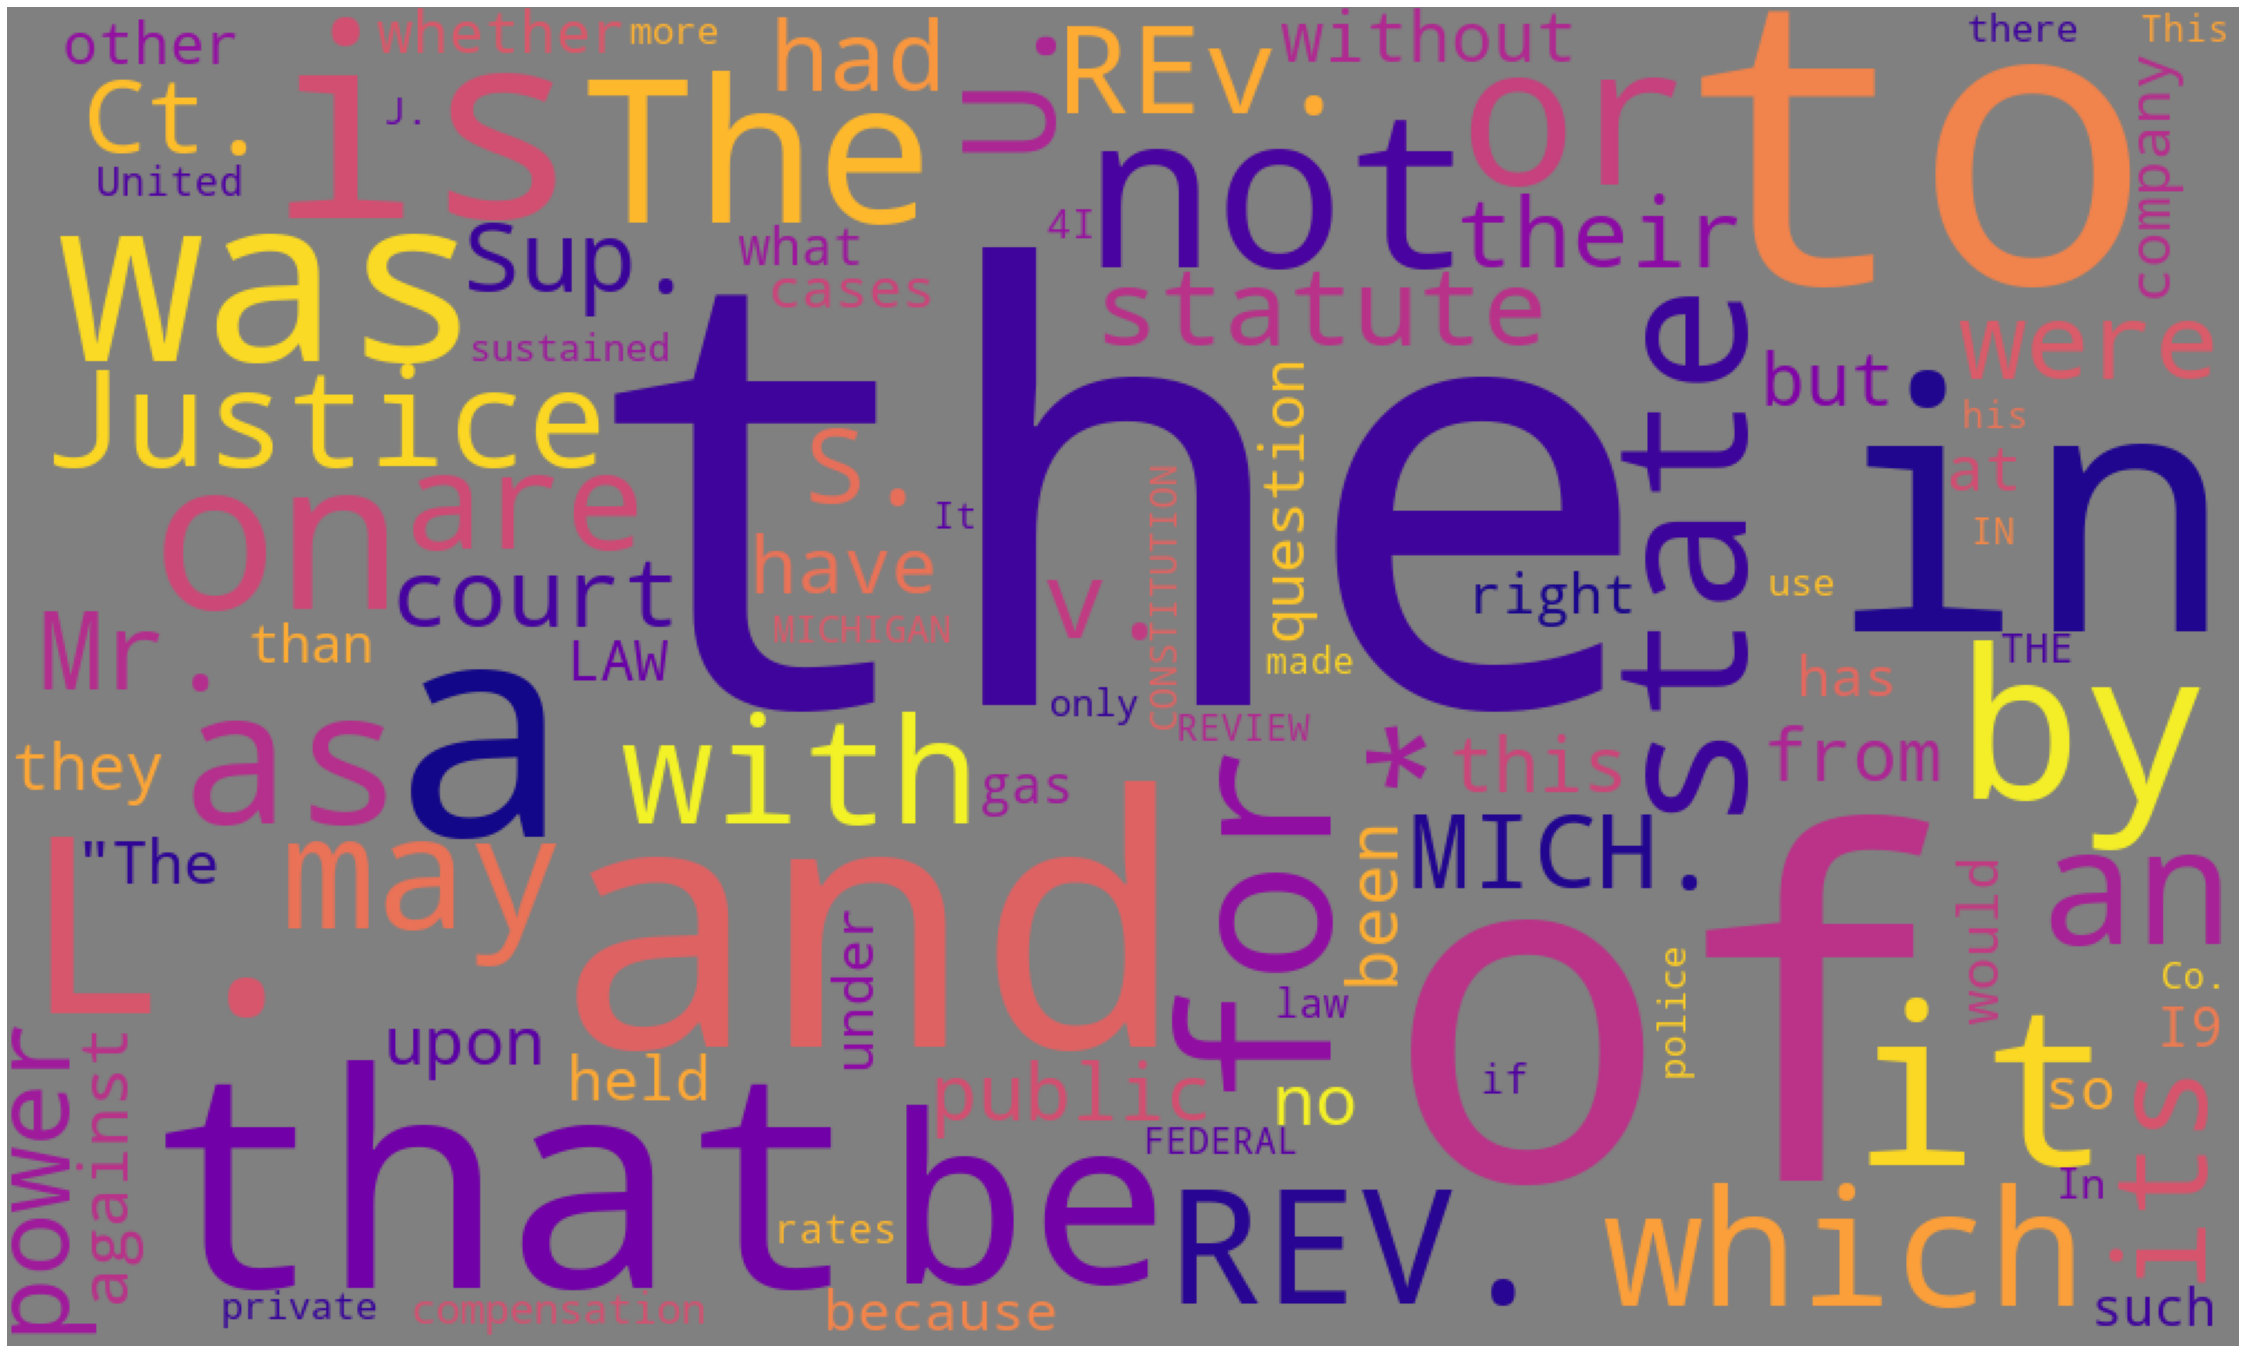

In [85]:
generate_word_cloud(df['unigramCount'].iloc[0])

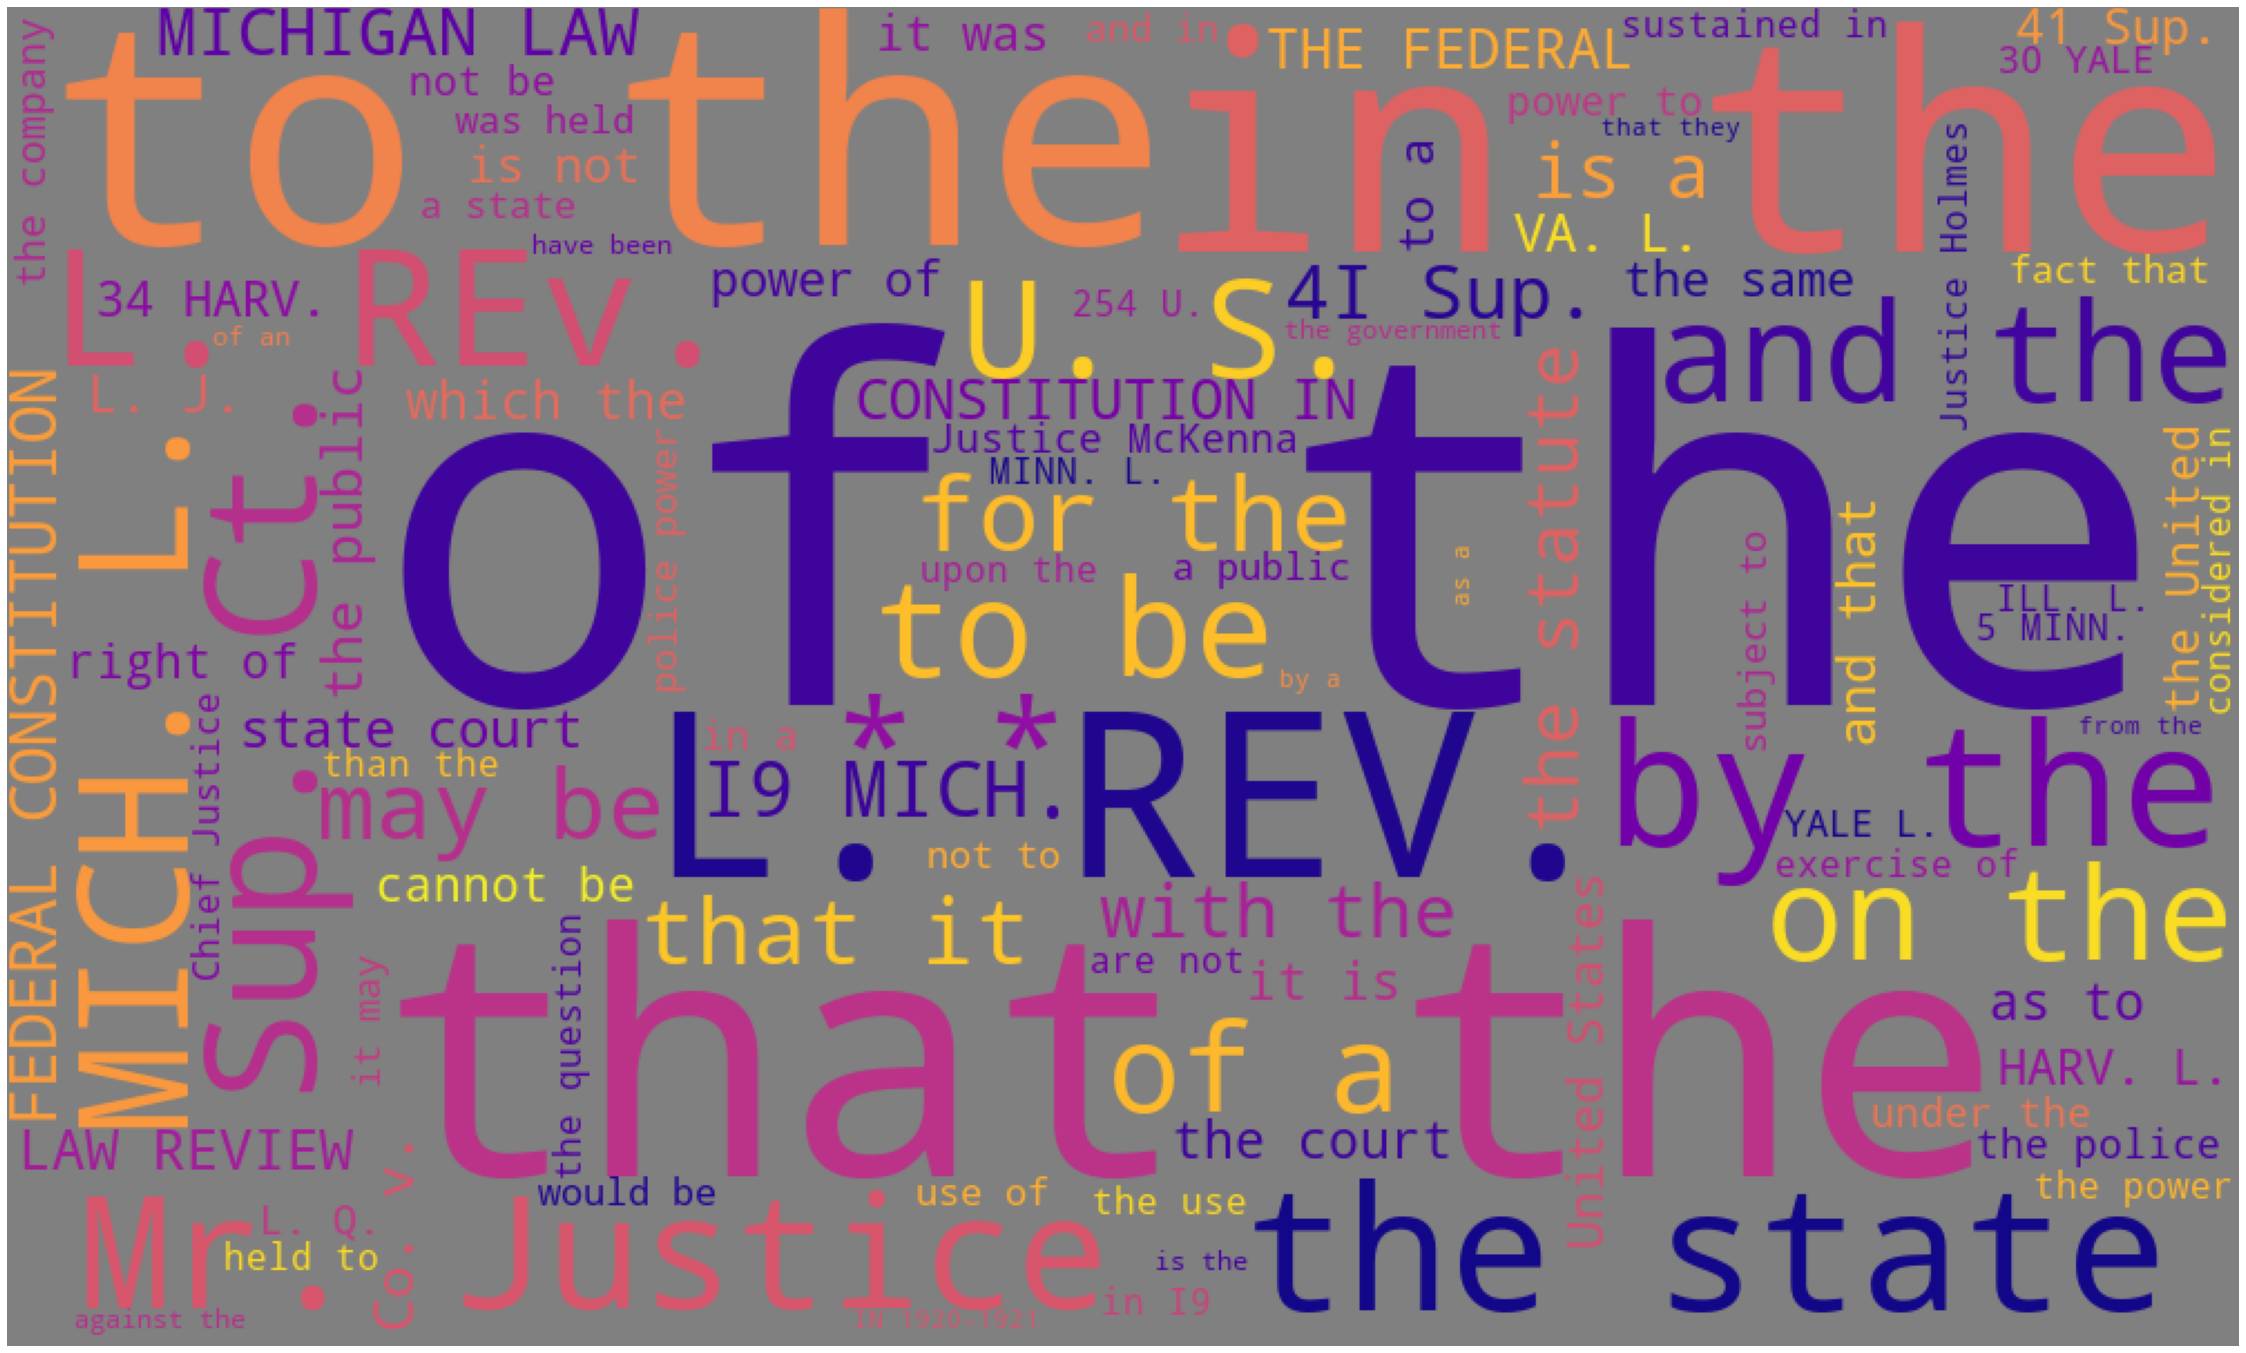

In [86]:
generate_word_cloud(df['bigramCount'].iloc[0])

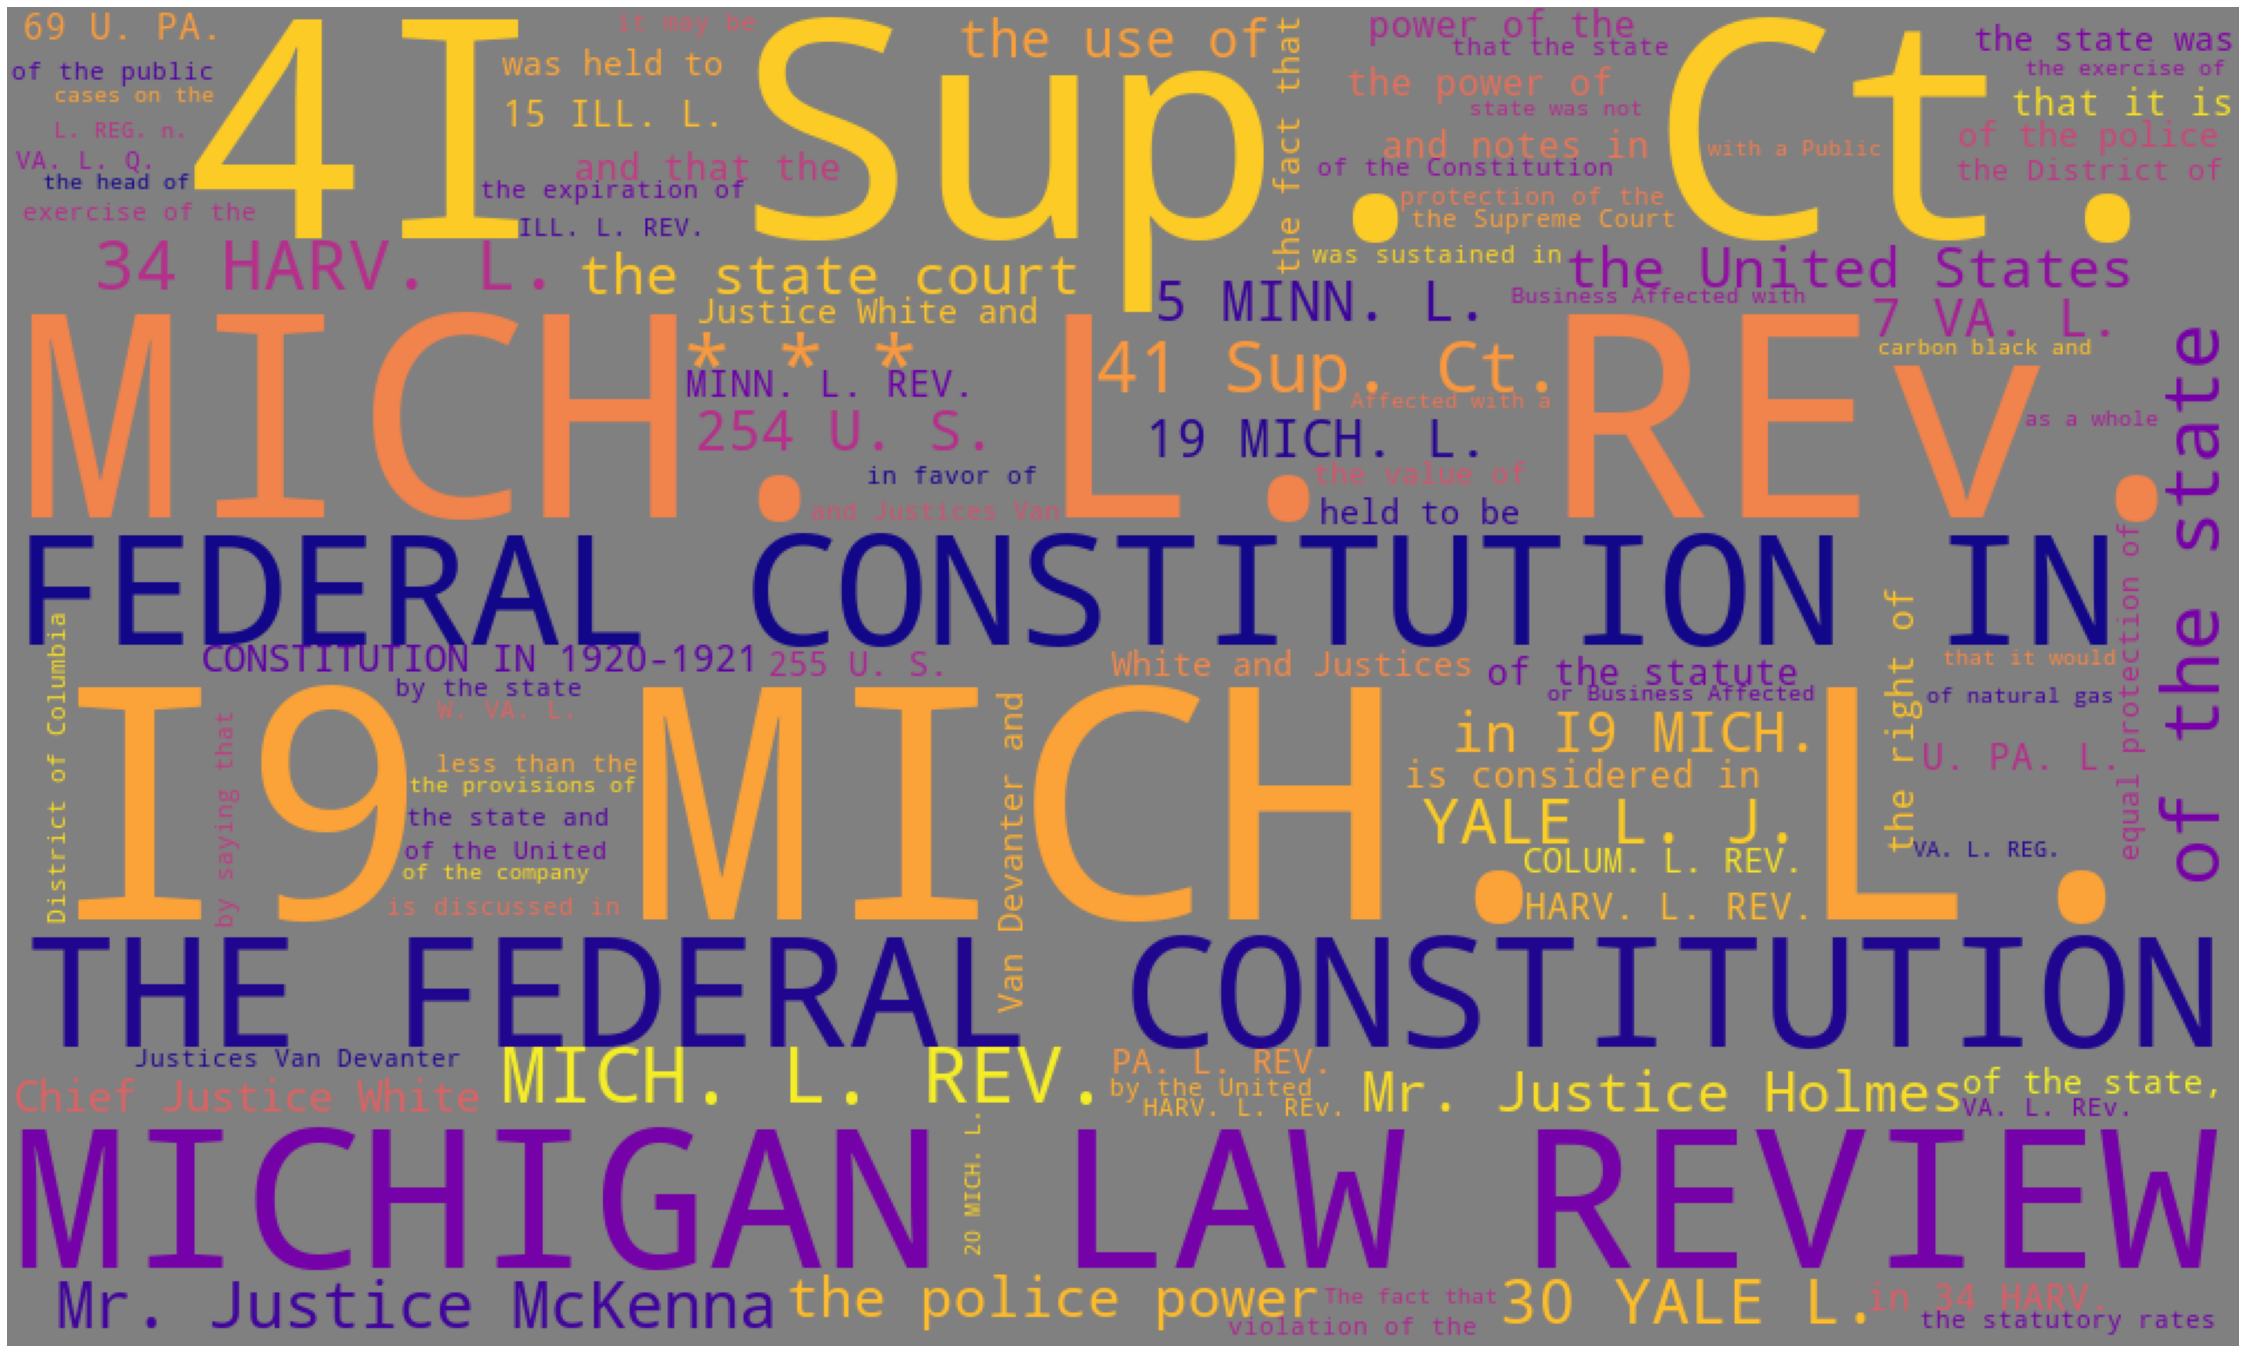

In [87]:
generate_word_cloud(df['trigramCount'].iloc[0])

So we see that we should probably do a little bit of cleaning of this data before we hop into creating the Word Clouds and we also can note that there a bunch of standard stopwords are present in the visualization. (We can note also that the WordCloud [documentation](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html?highlight=generate%20from%20frequencies) explicitly states that if one uses the `generate_from_frequencies` function, the standard stopwords are "[i]gnored if using `generate_from_frequencies`." To

In [88]:
test_list = ['the', 'and', 'has', 'hello', 'howdy', 'doody!']
stop_words = set(STOPWORDS)
print(stop_words)

cleaned_list = [i for i in test_list if i not in stop_words]
cleaned_list

def remove_stopwords_from_a_list(input_list):
    cleaned_list = [i for i in input_list if i not in stop_words]
    return(cleaned_list)

{"that's", "why's", "he'd", 'in', 'been', 'more', 'shall', 'your', 'yours', 'his', 'through', 'i', 'them', 'what', 'because', "when's", 'both', "there's", 'k', 'or', "isn't", "you'd", 'www', "how's", 'be', "they'd", 'above', "haven't", 'he', 'not', "he'll", "what's", '"The', 'yourselves', 'our', 'we', 'else', 'while', 'ourselves', 'cannot', 'than', 'themselves', 'whom', 'about', 'down', 'again', 'most', "don't", "aren't", 'below', 'out', "i'll", 'of', "they've", "who's", "you'll", "we're", 'was', 'should', 'up', "she'll", 'too', 'a', 'you', "we'd", "won't", "i've", 'then', 'are', 'as', 'were', 'can', 'itself', 'me', "she'd", 'have', 'do', 'any', "shan't", 'who', "can't", 'same', 'the', 'ever', "wasn't", 'their', "mustn't", 'him', 'until', 'other', 'here', 'ought', 'r', 'ours', 'nor', "weren't", 'is', "wouldn't", 'so', 'under', 'it', 'only', "couldn't", 'on', 'having', 'and', "it's", 'http', 'at', 'no', 'by', "we've", 'into', "here's", 'between', 'when', "i'd", 'how', 'such', "hadn't", 

In [89]:
remove_stopwords_from_a_list(test_list)

['hello', 'howdy', 'doody!']

Now, with the `sorted_unigram_dict` we're working with a list of tuples, how could we handle that? Well, let's write a function to help out:

In [90]:
def remove_stopwords_from_dict(dictionary):
    cleaned_dict = {k: v for k, v in dictionary.items() if k not in stop_words}
    return(cleaned_dict)

In [91]:
test_dictionary = {'the': 5673342, 'and': 2312, 'has': 2452, 'hello': 1, 'howdy': 65, 'doody!': 100}

In [92]:
remove_stopwords_from_dict(test_dictionary)

{'hello': 1, 'howdy': 65, 'doody!': 100}

Works perfectly.

In [93]:
def convert_tup_to_dict(list_of_tuples):
    result = dict(list_of_tuples)
    return(result)

In [94]:
test = [('the', 849), ('of', 499), ('to', 337), ('and', 251)]

In [95]:
result = convert_tup_to_dict(test)
result

{'the': 849, 'of': 499, 'to': 337, 'and': 251}

In [96]:
df['sorted_unigramCount_dict'] = df['sorted_unigramCount_dict'].apply(convert_tup_to_dict)

In [97]:
df['unigram_cleaned_of_stopwords'] = df['sorted_unigramCount_dict'].apply(remove_stopwords_from_dict)

In [98]:
df['unigram_cleaned_of_stopwords'] = df['sorted_unigram_dict'].apply(convert_tup_to_dict)
df['unigram_cleaned_of_stopwords'].head()

0                                                                                                                                                                                                        {'the': 849, 'of': 499, 'to': 337, 'and': 251, 'in': 243, 'a': 189, 'that': 180, 'is': 139, 'L.': 121, 'be': 109, 'was': 108, 'it': 96, 'not': 93, 'by': 87, 'on': 87, 'for': 84, 'The': 79, 'or': 75, 'as': 68, 'state': 67, 'which': 51, 'an': 51, 'REV.': 49, 'may': 47, 'with': 42, 'Justice': 40, 'are': 40, '*': 39, 'its': 37, 'U.': 37, 'REv.': 35, 'statute': 35, 'were': 35, 'Mr.': 35, 'power': 34, 'v.': 34, 'S.': 33, 'Ct.': 31, 'MICH.': 31, 'Sup.': 31, 'had': 31, 'court': 30, 'their': 30, 'public': 30, 'have': 30, 'this': 29, 'from': 28, 'but': 28, 'no': 26, 'been': 25, 'without': 25, 'upon': 24, 'against': 24, 'they': 23, 'at': 22, 'held': 21, '"The': 21, 'question': 21, 'other': 20, 'company': 20, 'whether': 20, 'so': 20, 'would': 19, 'because': 19, 'LAW': 19, 'I9': 19, 'cases': 19, 'unde

In [99]:
df['fullText'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [100]:
df.columns

Index(['creator', 'datePublished', 'docSubType', 'docType', 'fullText', 'id',
       'identifier', 'isPartOf', 'issueNumber', 'language', 'outputFormat',
       'pageCount', 'pageEnd', 'pageStart', 'pagination', 'provider',
       'publicationYear', 'publisher', 'sourceCategory', 'tdmCategory',
       'title', 'url', 'volumeNumber', 'wordCount', 'unigramCount',
       'bigramCount', 'trigramCount', 'abstract', 'collection', 'editor',
       'hasPartTitle', 'keyphrase', 'subTitle', 'sorted_unigram_dict',
       'sorted_unigramCount_dict', 'sorted_bigramCount_dict',
       'sorted_trigramCount_dict', 'unigram_cleaned_of_stopwords'],
      dtype='object')

In [101]:
df2 = df.sort_values(by='wordCount', ascending=False).reset_index()
print(df2['wordCount'].head())
print(df2.iloc[0])

0    188662
1     87918
2     72113
3     58842
4     53578
Name: wordCount, dtype: int64


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [102]:
import numpy as np
import seaborn as sns

stop_words = set(STOPWORDS)

def create_df(input):
    list_words = input.split(' ')
    set_words_full = list(set(list_words))

    set_words = [i for i in set_words_full if i not in stop_words]
    count_words = [list_words.count(i) for i in set_words]

    df = pd.DataFrame(zip(set_words, count_words), columns=['words', 'count'])
    df.sort_values('count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [103]:
print(stop_words)

{"that's", "why's", "he'd", 'in', 'been', 'more', 'shall', 'your', 'yours', 'his', 'through', 'i', 'them', 'what', 'because', "when's", 'both', "there's", 'k', 'or', "isn't", "you'd", 'www', "how's", 'be', "they'd", 'above', "haven't", 'he', 'not', "he'll", "what's", '"The', 'yourselves', 'our', 'we', 'else', 'while', 'ourselves', 'cannot', 'than', 'themselves', 'whom', 'about', 'down', 'again', 'most', "don't", "aren't", 'below', 'out', "i'll", 'of', "they've", "who's", "you'll", "we're", 'was', 'should', 'up', "she'll", 'too', 'a', 'you', "we'd", "won't", "i've", 'then', 'are', 'as', 'were', 'can', 'itself', 'me', "she'd", 'have', 'do', 'any', "shan't", 'who', "can't", 'same', 'the', 'ever', "wasn't", 'their', "mustn't", 'him', 'until', 'other', 'here', 'ought', 'r', 'ours', 'nor', "weren't", 'is', "wouldn't", 'so', 'under', 'it', 'only', "couldn't", 'on', 'having', 'and', "it's", 'http', 'at', 'no', 'by', "we've", 'into', "here's", 'between', 'when', "i'd", 'how', 'such', "hadn't", 

In [104]:
def get_color_dict(palette, number, start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d

In [105]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df_of_interest = df.iloc[0]
print(df_of_interest)

creator                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [106]:
full_text_of_interest = df_of_interest['fullText']
full_string = " ".join(full_text_of_interest)
print(full_string)

MICHIGAN LAW REVIEW VOL. XX JANUARY, 1922 No. 3 THE SUPREME COURT'S CONSTRUCTION OF THE FEDERAL CONSTITUTION IN I920-I92I, III1 IV. PoLIcE POWER THE difficulty of classifying cases on the police power has not evaporated since the review of decisions for the preceding year. The headings there suggested are used here. Classification on the basis of the objects of the legislation appears too precarious to be attempted with any confidence. It seems safer to work along the line of the subject matters with which the legislation deals. Certain topics are species of a wider genus, and thus the same case may be put in two or more groups. Readers who are dissatisfied with the classification adopted may be assured of the sympathy of the perpetrator. I. Physical Conditions A statute of Wyoming having for its declared purpose "the con- servation of natural gas" was sustained in Walls v. Midland Carbon Co.2 over the dissent of Chief Justice White and Justices Van Devanter and McReynolds. The legisla

In [107]:
list_words = full_string.split(' ')
list_words_lower = [x.lower() for x in list_words]
list_words_alpha_only = [x for x in list_words_lower if x.isalpha() == True]
set_words_full = list(set(list_words_alpha_only))
set_words = [i for i in set_words_full if i not in stop_words]
count_words = [list_words_alpha_only.count(i) for i in set_words]

df = pd.DataFrame(zip(set_words, count_words), columns=['words', 'counts'])
df.sort_values('counts', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

words  counts
0    state      68
1      may      47
2    court      41
3  justice      41
4    power      39
5   public      38
6      law      38
7  statute      35
8  without      27
9  federal      26

In [108]:
# We see below that "The" is showing up here, which means the stopwords of WordCloud isn't picking it up. If we print out the stop_words list we get the following:

print(stop_words)

# So we can handle this in a couple of different ways ... we could add "The" to the list of stop words (following https://stackoverflow.com/questions/53997443/how-to-add-extra-stop-words-in-addition-to-default-stopwords-in-wordcloud):

stop_words.add('The')
stop_words.add('THE')

print(stop_words)

# Of course, the simpler way is probably to simply convert all the words to lower case:



{"that's", "why's", "he'd", 'in', 'been', 'more', 'shall', 'your', 'yours', 'his', 'through', 'i', 'them', 'what', 'because', "when's", 'both', "there's", 'k', 'or', "isn't", "you'd", 'www', "how's", 'be', "they'd", 'above', "haven't", 'he', 'not', "he'll", "what's", '"The', 'yourselves', 'our', 'we', 'else', 'while', 'ourselves', 'cannot', 'than', 'themselves', 'whom', 'about', 'down', 'again', 'most', "don't", "aren't", 'below', 'out', "i'll", 'of', "they've", "who's", "you'll", "we're", 'was', 'should', 'up', "she'll", 'too', 'a', 'you', "we'd", "won't", "i've", 'then', 'are', 'as', 'were', 'can', 'itself', 'me', "she'd", 'have', 'do', 'any', "shan't", 'who', "can't", 'same', 'the', 'ever', "wasn't", 'their', "mustn't", 'him', 'until', 'other', 'here', 'ought', 'r', 'ours', 'nor', "weren't", 'is', "wouldn't", 'so', 'under', 'it', 'only', "couldn't", 'on', 'having', 'and', "it's", 'http', 'at', 'no', 'by', "we've", 'into', "here's", 'between', 'when', "i'd", 'how', 'such', "hadn't", 

In [109]:
import re

cleaned_full_string = re.sub('[^A-Za-z0-9°]+', ' ', full_string)

counts_df = create_df(full_string)
counts_df['length'] = df.words.str.len()
counts_df = counts_df[counts_df.length > 2]
counts_df.head()

words  count  length
0       L.    121     5.0
1    state     67     3.0
2     REV.     49     5.0
3      may     47     7.0
4  Justice     40     5.0

In [110]:
# We see below that "The" is showing up here, which means the stopwords of WordCloud isn't picking it up. If we print out the stop_words list we get the following:

print(stop_words)

# So we can handle this in a couple of different ways ... we could add "The" to the list of stop words (following https://stackoverflow.com/questions/53997443/how-to-add-extra-stop-words-in-addition-to-default-stopwords-in-wordcloud):

#stop_words = stop_words.add(['The', '"The'])
stop_words = STOPWORDS.update(['The', '"The'])
print(stop_words)


{"that's", "why's", "he'd", 'in', 'been', 'more', 'shall', 'your', 'yours', 'his', 'through', 'i', 'them', 'what', 'because', "when's", 'both', "there's", 'k', 'or', "isn't", "you'd", 'www', "how's", 'be', "they'd", 'above', "haven't", 'he', 'not', "he'll", "what's", '"The', 'yourselves', 'our', 'we', 'else', 'while', 'ourselves', 'cannot', 'than', 'themselves', 'whom', 'about', 'down', 'again', 'most', "don't", "aren't", 'below', 'out', "i'll", 'of', "they've", "who's", "you'll", "we're", 'was', 'should', 'up', "she'll", 'too', 'a', 'you', "we'd", "won't", "i've", 'then', 'are', 'as', 'were', 'can', 'itself', 'me', "she'd", 'have', 'do', 'any', "shan't", 'who', "can't", 'same', 'the', 'ever', "wasn't", 'their', "mustn't", 'him', 'until', 'other', 'here', 'ought', 'r', 'ours', 'nor', "weren't", 'is', "wouldn't", 'so', 'under', 'it', 'only', "couldn't", 'on', 'having', 'and', "it's", 'http', 'at', 'no', 'by', "we've", 'into', "here's", 'between', 'when', "i'd", 'how', 'such', "hadn't", 

In [111]:
index_list = [[i[0], i[-1]+1] for i in np.array_split(range(100), 5)]
print(index_list)

pd_index_list = pd.cut(range(100), bins=5, labels=False)
print(pd_index_list)

[[0, 20], [20, 40], [40, 60], [60, 80], [80, 100]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [112]:
array = np.array_split(range(100), 5)
print(array)
#print(array[0])
#print(array[-1])

#for x in array:
#    print(x[0])
#    print(x[-1])

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39]), array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59]), array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79]), array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97, 98, 99])]


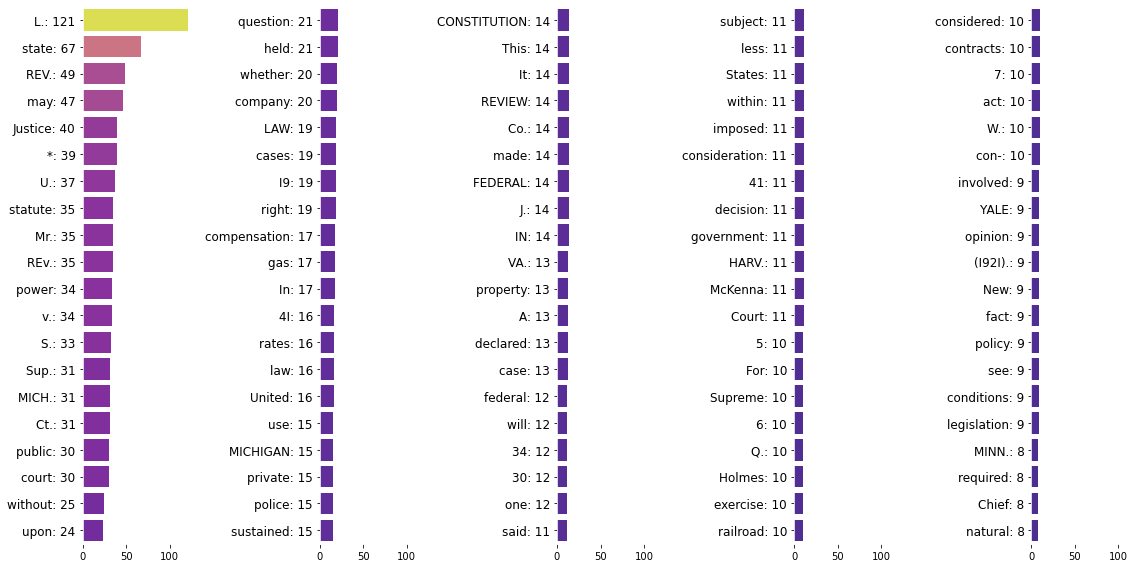

In [113]:
index_list = [[i[0], i[-1]+1] for i in np.array_split(range(100), 5)]

n = counts_df['count'].max()
color_dict = get_color_dict('plasma', n, 1)

fig, axs = plt.subplots(1, 5, figsize=(16, 8), facecolor='white', squeeze=False)
for col, idx in zip(range(0, 5), index_list):
    df = counts_df[idx[0]:idx[-1]]
    label = [w + ': ' + str(n) for w, n in zip(df['words'], df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0, 20))

    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient='h', ax = axs[0][col], palette=color_l)
    axs[0][col].set_xlim(0, n+1)
    axs[0][col].set_yticklabels(label, fontsize=12)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
    axs[0][col].spines['top'].set_color('white')

plt.tight_layout()
plt.show()
    

In [114]:
index_list = [[i[0], i[-1]+1] for i in np.array_split(range(100), 5)]
print(index_list)

[[0, 20], [20, 40], [40, 60], [60, 80], [80, 100]]


In [115]:
n = counts_df['count'].max()
n

121

In [116]:
for col, idx in zip(range(0, 5), index_list):
    print(col, idx)

0 [0, 20]
1 [20, 40]
2 [40, 60]
3 [60, 80]
4 [80, 100]


In [117]:
df = counts_df[idx[0]:idx[-1]]
print(len(df))
print(df)


20
          words  count  length
80   considered     10    11.0
81    contracts     10     8.0
82            7     10     9.0
83          act     10     8.0
84           W.     10     7.0
85         con-     10     6.0
86     involved      9     7.0
87         YALE      9     4.0
88      opinion      9     8.0
89      (I92I).      9     4.0
90          New      9     6.0
91         fact      9     7.0
92       policy      9     7.0
93          see      9     4.0
94   conditions      9     4.0
95  legislation      9    10.0
96        MINN.      8    10.0
97     required      8     7.0
98        Chief      8     6.0
99      natural      8     3.0


In [118]:
test_dictionary = {
    'word': ['hello', 'goodbye', 'howdy', 'happy day!'], 
    'count': [56, 87, 100, 25]
    }

test_df = pd.DataFrame(test_dictionary)
test_df.head()

word  count
0       hello     56
1     goodbye     87
2       howdy    100
3  happy day!     25

[[0, 30], [30, 60], [60, 90], [90, 120], [120, 150]]


<AxesSubplot:xlabel='word', ylabel='count'>

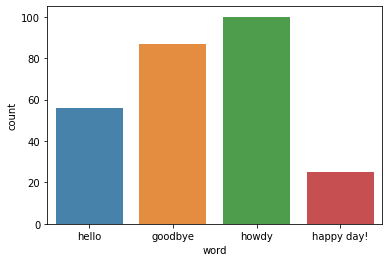

In [119]:
index_list = [[i[0], i[-1]+1] for i in np.array_split(range(150), 5)]
print(index_list)

n = test_df['count'].max()
color_dict = get_color_dict('plasma', n, 1)
#print(test_df)
test_range = range(0, 5)
'''
for col, idx in zip(test_range, index_list):
    label = [w + ': ' + str(n) for w, n in zip(test_df['word'], test_df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(test_df['count'])
    y = list(range(0, 20))
'''
x = list(test_df['count'])
y = list(range(0, 20))
sns.barplot(x = 'word', y = 'count', data=test_df, alpha=0.9)

1772


[Text(0, 0, 'L.'),
 Text(1, 0, 'state'),
 Text(2, 0, 'REV.'),
 Text(3, 0, 'may'),
 Text(4, 0, 'Justice'),
 Text(5, 0, '*'),
 Text(6, 0, 'U.'),
 Text(7, 0, 'statute'),
 Text(8, 0, 'Mr.'),
 Text(9, 0, 'REv.'),
 Text(10, 0, 'power'),
 Text(11, 0, 'v.'),
 Text(12, 0, 'S.'),
 Text(13, 0, 'Sup.'),
 Text(14, 0, 'MICH.'),
 Text(15, 0, 'Ct.'),
 Text(16, 0, 'public'),
 Text(17, 0, 'court'),
 Text(18, 0, 'without'),
 Text(19, 0, 'upon'),
 Text(20, 0, 'question'),
 Text(21, 0, 'held'),
 Text(22, 0, 'whether'),
 Text(23, 0, 'company'),
 Text(24, 0, 'LAW'),
 Text(25, 0, 'cases'),
 Text(26, 0, 'I9'),
 Text(27, 0, 'right'),
 Text(28, 0, 'compensation'),
 Text(29, 0, 'gas'),
 Text(30, 0, 'In'),
 Text(31, 0, '4I'),
 Text(32, 0, 'rates'),
 Text(33, 0, 'law'),
 Text(34, 0, 'United'),
 Text(35, 0, 'use'),
 Text(36, 0, 'MICHIGAN'),
 Text(37, 0, 'private'),
 Text(38, 0, 'police'),
 Text(39, 0, 'sustained'),
 Text(40, 0, 'CONSTITUTION'),
 Text(41, 0, 'This'),
 Text(42, 0, 'It'),
 Text(43, 0, 'REVIEW'),
 Text(

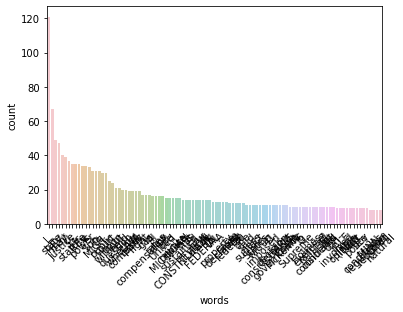

In [120]:
print(len(counts_df))
ax = sns.barplot(x = 'words', y = 'count', data=counts_df.iloc[0:100], alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[[0, 20], [20, 40], [40, 60], [60, 80], [80, 100]]


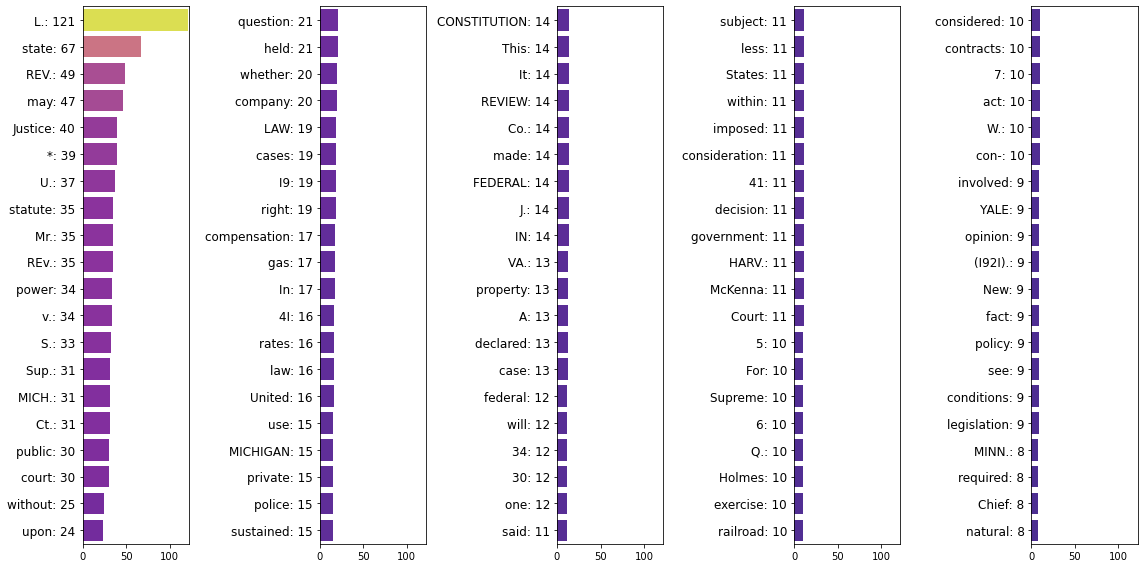

In [121]:
index_list = [[i[0], i[-1]+1] for i in np.array_split(range(100), 5)]
print(index_list)
n = counts_df['count'].max()
color_dict = get_color_dict('plasma', n, 1)

fig, axs = plt.subplots(1, 5, figsize=(16, 8), facecolor='white', squeeze=False)
for col, idx in zip(range(0, 5), index_list):
    df = counts_df[idx[0]:idx[-1]]
    #print(df)
    label = [w + ': ' + str(n) for w, n in zip(df['words'], df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0, 20))

    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient='h', ax = axs[0][col], palette=color_l)
    axs[0][col].set_xlim(0, n+1)
    axs[0][col].set_yticklabels(label, fontsize=12)
    #axs[0][col].spines['bottom'].set_color('white')
    #axs[0][col].spines['right'].set_color('white')
    #axs[0][col].spines['left'].set_color('white')
    #axs[0][col].spines['top'].set_color('white')

plt.tight_layout()
plt.show()

In [122]:
n = 30
pal = list(sns.color_palette(palette='tab10', n_colors=n).as_hex())

import plotly.express as px

fig = px.pie(counts_df[0:30], values='count', names='words', color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', hole=.6, hoverinfo='label+percent+name')

fig.update_layout(width=800, height=600, margin=dict(t=0, l=0, r=0, b=0))
fig.show()

In [123]:
import numpy as np
fig = px.treemap(counts_df[0:50], path=[px.Constant("word counts"), 'words'],
    values = 'count',
    color='count',
    color_continuous_scale='plasma',
    color_continuous_midpoint=np.average(counts_df['count']))

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()


In [124]:
import circlify

circles = circlify.circlify(counts_df['count'][0:30].tolist(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0))

n = counts_df['count'][0:30].max()
color_dict = get_color_dict('plasma', n, 1)

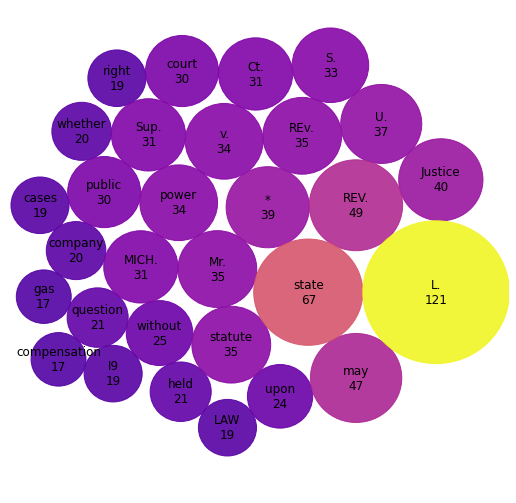

In [125]:
fig, ax = plt.subplots(figsize=(9, 9), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+ circle.r, abs(circle.y)+circle.r) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

labels = list(counts_df['words'][0:30])
counts = list(counts_df['count'][0:30])
labels.reverse()
counts.reverse()

for circle, label, count in zip(circles, labels, counts):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color=color_dict.get(count)))
    plt.annotate(label + '\n' + str(count), (x,y), size=12, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

In [126]:
print(stop_words)

None
